# Bài toán phân loại với Tensorflow

## SỬ dụng bộ dữ liệu MNIST

In [6]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Chuẩn hoá
x_train, x_test = x_train / 255.0, x_test / 255.0
m_train = x_train.shape[0]
print(x_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000,)

(60000, 28, 28)
(60000,)


# x_train có dữ liệu (28,28) nên cần được flatten trước khi đưa vào train

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile and train
model.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 20, verbose = 0)

## Hiển thị dữ liệu sao khi lưu thông tin vào biến **history**

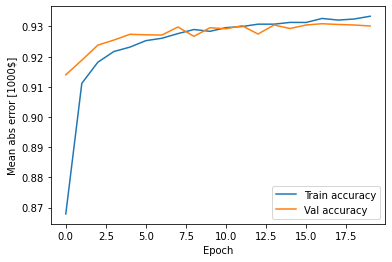

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean abs error [1000$]')
plt.plot(history.epoch, np.array(history.history['accuracy']), label = 'Train accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']), label = 'Val accuracy')
plt.legend()
plt.show()

### Có thể xem đây là hiện tượng Underfitting, xảy ra khi Model chưa đủ mạnh để train
### Cần sử dụng các model mạnh hơn như MLP, CNN, RNN

In [19]:
print((history.history.keys()))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Test bộ dữ liệu trên với mạng Multi-layer perceptron (MLP)

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
# compiler and train
model1.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
history1 = model1.fit(x_train, y_train, validation_split = 0.2, epochs = 20, verbose = 0)

In [29]:
print(history1.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


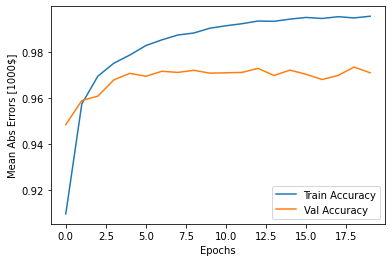

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Mean Abs Errors [1000$]')

plt.plot(history1.epoch, history1.history['accuracy'], label = 'Train Accuracy')
plt.plot(history1.epoch, history1.history['val_accuracy'], label = 'Val Accuracy')
plt.legend()
plt.show()


### Hiện tượng Overfitting, xảy ra khi dữ liệu train đạt kết quả tốt (độ chính xác cao) nhưng dữ liệu test hay validation thì lại không như sau:

In [38]:
# HIện tượng overfitting
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
# compile and train
model2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history2 = model2.fit(x_train, y_train, validation_split = 0.9,epochs = 20, verbose = 0)

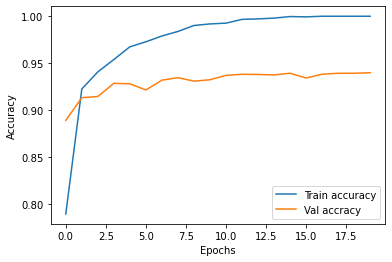

In [42]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(history2.epoch, history2.history['accuracy'], label = 'Train accuracy')
plt.plot(history2.epoch, history2.history['val_accuracy'], label = 'Val accracy')
plt.legend()
plt.show()

## Để giảm hiện tượng overfitting chúng ta có thể tăng dữ liệu Train, hàm Dropout, Early Stopping trong TF